In [1]:
# Step1 读取数据
import os
os.chdir('C:\\Users\\Cx_330\\Desktop\\ypjbyc\\01_叶片结冰预测\\train\\15')
import pandas as pd
import numpy as np

# Step1 读取数据
data = pd.read_csv("15_data.csv")
total = len(data)
print("sum of data:%d" % total)
des = data.describe()
fail_data = pd.read_csv("15_failureInfo.csv")
normal_data = pd.read_csv("15_normalInfo.csv")

sum of data:393886


In [2]:
# 转化data时间列为datetime
times = []
for i in range(len(data)):
    #dt = pd.to_datetime(data.ix[i][0])
    dt = pd.to_datetime(data.loc[i][0])
    times.append(dt)
    if(i%10000==0):
        print("complete %d / %d" % (i,len(data)))
times = pd.Series(times)
data.time = times

complete 0 / 393886
complete 10000 / 393886
complete 20000 / 393886
complete 30000 / 393886
complete 40000 / 393886
complete 50000 / 393886
complete 60000 / 393886
complete 70000 / 393886
complete 80000 / 393886
complete 90000 / 393886
complete 100000 / 393886
complete 110000 / 393886
complete 120000 / 393886
complete 130000 / 393886
complete 140000 / 393886
complete 150000 / 393886
complete 160000 / 393886
complete 170000 / 393886
complete 180000 / 393886
complete 190000 / 393886
complete 200000 / 393886
complete 210000 / 393886
complete 220000 / 393886
complete 230000 / 393886
complete 240000 / 393886
complete 250000 / 393886
complete 260000 / 393886
complete 270000 / 393886
complete 280000 / 393886
complete 290000 / 393886
complete 300000 / 393886
complete 310000 / 393886
complete 320000 / 393886
complete 330000 / 393886
complete 340000 / 393886
complete 350000 / 393886
complete 360000 / 393886
complete 370000 / 393886
complete 380000 / 393886
complete 390000 / 393886


In [3]:
# 转化normal_data & fail_data时间列为datetime

def to_datetime(obj_pd): 
    Ser1 = obj_pd.iloc[:,0]
    Ser2 = obj_pd.iloc[:,1]
    for i in range(len(Ser1)):
        Ser1[i] = pd.to_datetime(Ser1[i])
        Ser2[i] = pd.to_datetime(Ser2[i])
    obj_pd.iloc[:,0] = Ser1
    obj_pd.iloc[:,1] = Ser2
    return obj_pd
        
normal_data = to_datetime(normal_data)
fail_data = to_datetime(fail_data)

In [4]:
# 根据datetime创建labels列表

labels = []
for i in range(len(times)):
    if(i%100000==0):
        print("complete %d / %d" % (i,len(times)))
    flag = 0
    for j in range(len(normal_data)):
        if((times[i] >= normal_data.startTime[j]) and (times[i] <= normal_data.endTime[j])):
            labels.append(0)
            flag = 1
            break
    for j in range(len(fail_data)):
        if(flag==1):
            break
        elif((times[i] >= fail_data.startTime[j]) and (times[i] <= fail_data.endTime[j])):
            labels.append(1)
            flag = 1
            break
    if(flag == 1):
        continue
    labels.append(-1)
print("complete all")

complete 0 / 393886
complete 100000 / 393886
complete 200000 / 393886
complete 300000 / 393886
complete all


In [5]:
# print 数据信息
def data_judge(labels,total):
    sum_inv = 0
    for i in range(len(labels)):
        if(labels[i] == -1):
            sum_inv = sum_inv + 1
    print("sum of invalid data : %d , %.2f %%" % (sum_inv,sum_inv/total*100))
    
    sum_nor = 0
    for i in range(len(labels)):
        if(labels[i] == 0):
            sum_nor = sum_nor + 1
    print("sum of normal data : %d , %.2f %% " % (sum_nor,sum_nor/total*100))
    
    sum_fail = 0
    for i in range(len(labels)):
        if(labels[i] == 1):
            sum_fail = sum_fail + 1
    print("sum of failure data : %d , %.2f %% " % (sum_fail,sum_fail/total*100))
    
data_judge(labels,total)

sum of invalid data : 19785 , 5.02 %
sum of normal data : 350255 , 88.92 % 
sum of failure data : 23846 , 6.05 % 


In [6]:
# 删除无效数据
y = labels
indexes = []
for i in range(len(y)):
    if(y[i] == -1):
        indexes.append(i)
data = data.drop(indexes)
data = data.drop('time',axis=1)
for i in range(len(y)-1,-1,-1):
    if(y[i]==-1):
        y.pop(i)

In [26]:
data

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
0,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,0.551111,...,0.061109,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1
1,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,0.191111,...,-1.209522,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1
2,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,0.960000,...,0.061109,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1
3,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,0.177778,...,0.061109,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1
4,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,0.204444,...,-1.209522,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393880,-0.474489,-1.123012,-0.863113,0.042048,-0.009170,-0.684464,0.309873,0.204444,0.195556,0.204444,...,0.061109,-1.604824,-1.665902,0.984615,1.000000,1.000000,1.24,1.32,-0.40,3853
393881,-0.113069,-1.179516,-0.883126,0.033416,0.826745,-0.742660,-0.527336,0.204444,0.195556,0.204444,...,0.061109,-1.620604,-1.665902,1.000000,1.013846,1.000000,-0.52,-0.04,-1.48,3853
393882,0.034450,-1.136307,-0.871127,0.145629,0.330262,-0.742660,-0.457568,0.204444,0.195556,0.204444,...,0.061109,-1.620604,-1.665902,1.000000,1.013846,1.000000,0.32,-2.36,1.84,3853
393883,0.292608,-1.129659,-0.877126,-0.085703,-1.540414,-0.731058,-0.073848,0.204444,0.195556,0.204444,...,-1.209522,-1.620604,-1.686936,1.000000,1.013846,1.000000,1.20,0.12,1.28,3853


In [40]:
x=data.iloc[:,:-1]

In [41]:
from sklearn.model_selection import train_test_split
# 随机选择百分之10的数据
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=666, shuffle = True)# shuffle默认为True
# 在选择的数据中，选择2/3作为训练集，1/3作为测试集
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=666, shuffle = False)# shuffle默认为True

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [69]:
from keras import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,BatchNormalization,Add,concatenate,Flatten

model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(1,26)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# model.add(Dense(units=256))
# model.add(Dropout(0.2))
model.add(Dense(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=16))
model.add(Dropout(0.2))

model.add(Dense(units=2,activation="softmax"))

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler

checkpoint = ModelCheckpoint("lstm.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1)
                              #min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

In [44]:
X_train

,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,pitch3_angle,...,acc_x,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC
21704,-0.692079,-0.906964,-0.697198,-1.903557,-2.045763,-0.154786,0.135455,0.351111,0.337778,0.333333,...,0.100890,0.061109,0.714927,0.990138,0.815385,1.153846,0.661538,0.40,-0.76,0.04
137032,-0.695767,-0.837165,-0.665163,-0.525924,-2.224345,-0.405088,-0.004080,0.328889,0.355556,0.351111,...,0.100890,0.061109,-0.231910,-0.040535,0.923077,1.046154,0.629231,2.24,-0.52,-0.52
327740,-0.703143,-0.700889,-0.651149,0.347613,1.536006,-0.579674,-0.108731,0.217778,0.204444,0.222222,...,0.100890,0.061109,-1.447018,-1.570292,1.090769,1.046154,0.706154,-0.80,0.68,-0.68
223176,0.827363,1.243537,1.428437,-1.238909,-0.244746,1.201421,-0.004080,0.297778,0.231111,0.204444,...,-1.023986,-2.480153,-0.877337,-1.187853,0.936923,0.583077,1.123077,0.68,-2.40,2.08
86442,0.757291,0.282958,-0.112464,1.381700,1.989426,-0.370142,-0.004080,0.355556,0.360000,0.337778,...,1.225767,0.061109,0.209947,0.454723,0.583077,0.753846,1.323077,-0.68,-0.20,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356701,-0.293779,-0.428337,-0.522987,0.646272,0.746953,-0.626269,0.379641,0.208889,0.204444,0.204444,...,-1.023986,0.061109,-0.798434,-0.671560,0.846154,1.215385,1.153846,-0.52,-0.68,1.28
154418,-0.489241,-1.152926,-1.039339,-3.626461,-0.362534,-0.684464,-0.038964,0.324444,0.248889,0.253333,...,0.100890,0.061109,-0.973599,-1.017667,0.984615,1.076923,1.000000,-0.48,-0.48,0.52
255130,-1.090380,-1.166221,-0.923175,1.228055,0.613966,0.933693,0.030804,0.191111,0.177778,0.217778,...,0.100890,0.061109,0.273070,-0.422974,1.090769,0.846154,0.600000,0.36,1.88,0.60
86833,-0.341723,0.036996,-0.276669,0.483995,-1.237712,-0.451635,-0.004080,0.355556,0.360000,0.337778,...,1.225767,0.061109,0.227306,0.494880,0.846154,1.290769,0.644615,0.40,1.36,-1.88


In [22]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [52]:
x_train.shape

(25064, 26)

In [71]:
from tensorflow.python.keras.utils.np_utils import to_categorical
XX_train = x_train.reshape((-1,1,26))
XX_test = x_test.reshape((-1,1,26))
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [72]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [63]:
print(XX_train.shape)
print(Y_train.shape)
print(XX_test.shape)
print(Y_test.shape)

(25064, 1, 26)
(25064, 2)
(12346, 1, 26)
(12346, 2)


In [73]:
history_fit = model.fit(x=XX_train, 
                        y=Y_train, 
                        batch_size=8, 
                        epochs=10, 
                        verbose=1, 
                        validation_data=(XX_test, Y_test),
                        callbacks=callbacks)

Epoch 1/10


3130/3133 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9466
Epoch 1: val_loss improved from inf to 0.13548, saving model to lstm.h5
3133/3133 [==============================] - 37s 10ms/step - loss: 0.1608 - accuracy: 0.9465 - val_loss: 0.1355 - val_accuracy: 0.9524 - lr: 0.0010
Epoch 2/10
   6/3133 [..............................] - ETA: 32s - loss: 0.0878 - accuracy: 0.9792

C:\Users\Cx_330\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3133/3133 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9520
Epoch 2: val_loss improved from 0.13548 to 0.12566, saving model to lstm.h5
3133/3133 [==============================] - 30s 9ms/step - loss: 0.1353 - accuracy: 0.9520 - val_loss: 0.1257 - val_accuracy: 0.9534 - lr: 0.0010
Epoch 3/10
3132/3133 [============================>.] - ETA: 0s - loss: 0.1246 - accuracy: 0.9537
Epoch 3: val_loss improved from 0.12566 to 0.11683, saving model to lstm.h5
3133/3133 [==============================] - 451s 144ms/step - loss: 0.1246 - accuracy: 0.9538 - val_loss: 0.1168 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 4/10
3131/3133 [============================>.] - ETA: 0s - loss: 0.1197 - accuracy: 0.9551
Epoch 4: val_loss improved from 0.11683 to 0.11456, saving model to lstm.h5
3133/3133 [==============================] - 29s 9ms/step - loss: 0.1198 - accuracy: 0.9551 - val_loss: 0.1146 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 5/10
3130/3133 [=======================

In [74]:
history_fit = model.fit(x=XX_train, 
                        y=Y_train, 
                        batch_size=8, 
                        epochs=20, 
                        verbose=2, 
                        validation_data=(XX_test, Y_test),
                        callbacks=callbacks)

Epoch 1/20
3131/3133 [============================>.] - ETA: 0s - loss: 0.0853 - accuracy: 0.9678
Epoch 1: val_loss improved from 0.09121 to 0.08555, saving model to lstm.h5
3133/3133 [==============================] - 27s 8ms/step - loss: 0.0853 - accuracy: 0.9678 - val_loss: 0.0856 - val_accuracy: 0.9678 - lr: 0.0010
Epoch 2/20
3127/3133 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9697
Epoch 2: val_loss improved from 0.08555 to 0.07932, saving model to lstm.h5
3133/3133 [==============================] - 26s 8ms/step - loss: 0.0812 - accuracy: 0.9697 - val_loss: 0.0793 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 3/20
3133/3133 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.9719
Epoch 3: val_loss did not improve from 0.07932
3133/3133 [==============================] - 26s 8ms/step - loss: 0.0767 - accuracy: 0.9719 - val_loss: 0.0903 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 4/20
3131/3133 [============================>.] - ETA: 0s - 

In [75]:
history_fit = model.fit(x=XX_train, 
                        y=Y_train, 
                        batch_size=8, 
                        epochs=20, 
                        verbose=2, 
                        validation_data=(XX_test, Y_test),
                        callbacks=callbacks)

Epoch 1/20

Epoch 1: val_loss improved from 0.04999 to 0.04830, saving model to lstm.h5
3133/3133 - 24s - loss: 0.0340 - accuracy: 0.9868 - val_loss: 0.0483 - val_accuracy: 0.9848 - lr: 2.0000e-04 - 24s/epoch - 8ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.04830 to 0.04703, saving model to lstm.h5
3133/3133 - 23s - loss: 0.0303 - accuracy: 0.9878 - val_loss: 0.0470 - val_accuracy: 0.9847 - lr: 2.0000e-04 - 23s/epoch - 7ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.04703 to 0.04618, saving model to lstm.h5
3133/3133 - 24s - loss: 0.0304 - accuracy: 0.9875 - val_loss: 0.0462 - val_accuracy: 0.9847 - lr: 2.0000e-04 - 24s/epoch - 8ms/step
Epoch 4/20

Epoch 4: val_loss did not improve from 0.04618
3133/3133 - 25s - loss: 0.0295 - accuracy: 0.9877 - val_loss: 0.0487 - val_accuracy: 0.9870 - lr: 2.0000e-04 - 25s/epoch - 8ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.04618
3133/3133 - 24s - loss: 0.0295 - accuracy: 0.9883 - val_loss: 0.0533 - val_accuracy: 0.985

In [83]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    Normalization can be applied by setting `normalize = True`.
    """
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j], fontsize=15,
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    #plt.savefig("matrix.jpg")

In [78]:
#Predict
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(XX_test)
y_prediction = np.argmax (y_prediction, axis = 1)
yy_test=np.argmax(Y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(yy_test, y_prediction , normalize='pred')
print(result)

386/386 [==============================] - 2s 4ms/step
[[0.98763736 0.06446991]
 [0.01236264 0.93553009]]


Confusion matrix, without normalization
[[11504    45]
 [  144   653]]


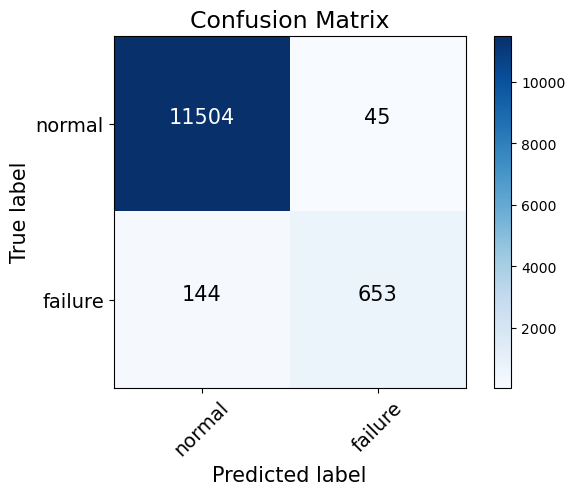

In [87]:
cm = confusion_matrix(y_test, y_prediction)
cm_plot_labels = ['normal', 'failure']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [9]:
import torch.nn as nn
class CNNLSTM(nn.Module):
    def __init__(self, num_features, hidden_size, num_classes=1):
        super(CNNLSTM, self).__init__()
        self.Conv1=nn.Conv1d(
            in_channels=num_features, out_channels=64, kernel_size=3, padding=1
        )
        self.Conv2=nn.Conv1d(
            in_channels=64, out_channels=128, kernel_size=3, padding=1
        )
        self.maxpool1=nn.MaxPool1d(kernel_size=2,stride=2)
        self.Conv1=nn.Conv1d(
            in_channels=128, out_channels=128, kernel_size=5, padding=2
        )
        self.Conv4=nn.Conv1d(
            in_channels=128,out_channels=256, kernel_size=5, padding=2
        )
        self.maxpool2=nn.MaxPool1d(kernel_size=2,stride=2)
        self.relu=nn.ReLu()
        self.fc=nn.Linear(hidden_size, num_classes)
        self.dropout=nn.Dropout(0.5)
        
        self.lstm=nn.LSTM(input_size=256, hidden_size=hidden_size, batch_first=True)
    
    def forward():
        x=x.transposse(1,2)
        x=self.relu(self.Conv1(x))
        x=self.relu(self.Conv2(x))
        x=self.maxpool1(x)
        x=self.relu(self.Conv3(x))
        x=self.relu(self.Conv4(x))
        x=self.maxpool2(x)
        x=self.dropout(x)
        x=self.transpose(1,2)
        x=self.lstm(x)
        x=self.dropout(x)
        x=x[:,-1,:]
        x=self.fc(x)
        return x

In [13]:
from torch.utils.data import TensorDataset, DataLoader
def setup_data_loaders(X_train, y_train, X_val, y_val, batch_size):
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
    return DataLoader(train_dataset, batch_size=batch_size, shuffle=True), DataLoader(val_dataset, batch_size=batch_size)


In [12]:
train_loader, val_loader = setup_data_loaders(X_train, y_train, X_test, y_test, batch_size)
num_features = X_train.shape[1]
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CNNLSTM(num_features, 32).to(device)
opti=torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    train_loss=0.0
    for sequences, labels in train_loader:
        sequences = sequences.float().to(device)
        labels = labels.float().to(device)
        outputs = model(sequences).squeeze()
        loss = nn.MSELoss(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences = sequences.float().to(device)
            labels = labels.float().to(device)
            outputs = model(sequences).squeeze()
            loss = nn.MSELoss(outputs, labels)
            val_loss += loss.item()

        # Test the model's performance
    test_rmse, _, _, _ = test_model_performance(
        model, X_test, engine_test_data, engine_test_unit_indices
    )

    if test_rmse < best_scores[engine_number]["RMSE"]:
        best_scores[engine_number]["RMSE"] = test_rmse
        best_config_per_engine[engine_number].update(
            {
                "sequence_length": sequence_length,
                "num_lstms": num_lstms,
                "learning_rate": lr,
            }
        )
        print(
            f"New best model found for engine {engine_number} w/ RMSE: {test_rmse}"
        )
        torch.save(model.state_dict(), f"best_saved_models/best_model_engine_{engine_number}_{round(test_rmse,2)}.pt")

    # Print epoch results
    print(
        f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, "
        f"Validation Loss: {val_loss/len(val_loader):.4f}",
        f"Test RMSE: {test_rmse:.4f}",
    )

(25064, 27)